In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
item_details = pd.read_csv('transaction_performance.csv')
item_details['Product Revenue'] = item_details['Product Revenue'].replace('[\$,]', '', regex=True).astype(float)
item_details['Transaction ID'] = item_details['Transaction ID'].replace('[\#,]', '', regex=True).astype('float')
item_details['Transaction ID'] = item_details['Transaction ID'].replace('[\#,]', '', regex=True).astype('int64')

In [3]:
import re
item_details['Product'] = item_details['Product'].str.replace(r'(\/ \w*)$','')

In [4]:
item_details

,Product SKU,Transaction ID,Product,Source,City,Product Revenue,Quantity
0,GAM1700,7538,Wishes for the Couple Cards,(direct),Washington,944.41,47
1,TAN500-JD-BLACK-M,118331000000,Black & White Drunk in Love Tanks - Just Drunk...,google,Nashville,787.01,39
2,TAN700-CC-L,7678,Champagne Campaign Tanks - Champagne Campaign ...,(direct),Chicago,629.61,31
3,TAN700-CC-M,6602,Champagne Campaign Tanks - Champagne Campaign ...,(direct),Washington,577.14,29
4,TAN800-FSTR-M,6634,Final Fiesta Tanks - Fiesta Siesta Tequila Rep...,google,Encinitas,577.14,29
5,HAI1700,8881,Fluffy Pom-Pom Bachelorette Beanies - Black (B...,Sumo,Tuckahoe,566.65,24
6,5.28755E+12,6828,Custom Listing for Morgan Kelly,outlook.live.com,Bloomington,472.21,3
7,TAN1100-LL-M,8430,Lake Life Tanks - Lake Life (Teal),(direct),Denver,472.21,24
8,HAI1700,8746,Fluffy Pom-Pom Bachelorette Beanies - Black (B...,google,Escondido,440.73,18
9,TUM100,8760,Blue & Purple Confetti Tumbler,pinterest.com,Syosset,440.73,37


In [42]:
# transactions = pd.DataFrame(item_details.groupby(item_details['Transaction ID'])['Product Revenue'].sum().sort_values(ascending=False))

transactions = pd.DataFrame(item_details.groupby(['Transaction ID', 'Source'])['Product Revenue'].sum().sort_values(ascending=False)).reset_index()
# combos_counts = all_combos.groupby(['item 1','item 2']).size().reset_index().rename(columns={0:'count'})


In [52]:
large_orders = transactions[transactions['Product Revenue']>75]

In [30]:
transactions['Product Revenue'].describe()

count    1143.000000
mean      168.040411
std       194.899922
min        10.360000
25%        52.470000
50%       102.310000
75%       209.870000
max      3153.290000
Name: Product Revenue, dtype: float64

In [54]:
transactions.Source.value_counts().head(10)

google                  687
(direct)                211
pinterest.com            58
Master                   47
l.instagram.com          25
bing                     14
Facebook                 12
m.facebook.com            9
checkout.shopify.com      8
pay.shopify.com           7
Name: Source, dtype: int64

In [58]:
large_orders.Source.value_counts().head(10)

google                  444
(direct)                111
pinterest.com            35
Master                   29
l.instagram.com          19
bing                      9
Facebook                  5
checkout.shopify.com      5
l.facebook.com            4
yahoo                     4
Name: Source, dtype: int64

(array([ 32., 191., 220., 127.,  62., 102.,  47.,  54.,  42.,  18.,  30.,
         33.,  28.,  31.,  16.,  12.,  15.,   9.,  12.,   5.,  10.,   3.,
          4.,   8.,   2.,   2.,   4.,   4.,   4.,   0.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,
          1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.]),
 array([   0,   25,   50,   75,  100,  125,  150,  175,  200,  225,  250,
         275,  300,  325,  350,  375,  400,  425,  450,  475,  500,  525,
         550,  575,  600,  625,  650,  675,  700,  725,  750,  775,  800,
         825,  850,  875,  900,  925,  950,  975, 1000, 1025, 1050, 1075,
        1100, 1125, 1150, 1175, 1200, 1225, 1250, 1275, 1300, 1325, 1350,
        1375, 1400, 1425, 1450, 1475, 1500, 1525, 1550, 1575, 1600, 1625,
        1650, 16

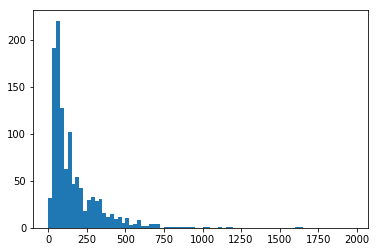

In [63]:
plt.hist(transactions['Product Revenue'], bins = list(range(0,2000, 25)))

In [61]:
list(transactions['Product Revenue'])

[3153.2899999999977,
 1642.1100000000001,
 1605.49,
 1180.38,
 1164.7600000000002,
 1112.2999999999997,
 1048.3000000000002,
 1009.9900000000002,
 944.4100000000001,
 918.1700000000003,
 894.5600000000002,
 855.2100000000002,
 839.4700000000003,
 813.0900000000003,
 778.6100000000002,
 755.5200000000002,
 722.48,
 718.7900000000002,
 713.5500000000001,
 702.2700000000001,
 687.3100000000002,
 682.08,
 682.08,
 682.0700000000002,
 674.2,
 663.7200000000001,
 662.1300000000001,
 655.8300000000002,
 637.4700000000001,
 629.5900000000001,
 624.35,
 621.6200000000002,
 585.0000000000001,
 585.0,
 582.3800000000001,
 582.37,
 577.1400000000001,
 577.13,
 577.13,
 577.12,
 571.9000000000001,
 569.13,
 566.65,
 561.4,
 540.3900000000001,
 529.9100000000001,
 527.2800000000002,
 524.6800000000001,
 524.68,
 524.6700000000001,
 519.2900000000001,
 514.1800000000001,
 508.94000000000005,
 503.69,
 503.68000000000006,
 503.15999999999997,
 501.06000000000006,
 490.56000000000006,
 487.94,
 477.849

In [31]:
pd.DataFrame(item_details.groupby(item_details['Product'])['Product Revenue'].sum().sort_values(ascending=False))

,Product Revenue
Product,
Final Fiesta Tanks - Fiesta Siesta Tequila Repeat (Guests),6505.98
Champagne Campaign Tanks - Champagne Campaign (Heather Black),5230.98
Bride To Be Headband Veil,4029.44
Bride Tribe Gold Tattoo Party Pack - Party Pack (11 Bride Tribe / 1 Bride),3274.08
Blush Ombre Confetti Tumbler,3242.44
Drinking Buddies Drink Markers (6 Pack),3085.08
Drinking Buddies Drink Markers (12 Pack),2951.11
Black & White Bride Tribe Tanks - Bride Tribe (Black Tank),2728.31
Wishes for the Couple Cards,2466.03


In [32]:
pd.DataFrame(item_details.groupby(item_details['Product'])['Quantity'].sum().sort_values(ascending = False))

,Quantity
Product,
Heart Sunnies - Light Pink,390
Heart Sunnies - Hot Pink,357
Final Fiesta Tanks - Fiesta Siesta Tequila Repeat (Guests),335
Blush Ombre Confetti Tumbler,314
Champagne Campaign Tanks - Champagne Campaign (Heather Black),266
Heart Sunnies - White,255
Retro Heart Sunnies - Light Pink (Classic Lenses),246
I Do Crew Flower Crowns - Pink,245
I Do Crew Flower Crowns - Peach,228
